In [11]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# 05_predictive_modeling.ipynb

# Predicting Shipping Costs using Linear Regression
# import libarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
# Load cleaned data
df = pd.read_csv("C:/Users/User/OneDrive/DS/Projekte/SCM Analysis/data/cleaned/supply_chain_data_cleaned.csv")

# Drop rows with missing target value
df = df.dropna(subset=["Shipping costs"])

### Select Features
The features got selected according to xxxx

In [14]:
# 1. Select Features and Target
features = ["Product type", "Order quantities", "Lead time", "Shipping carriers", "Transportation modes"]
target = "Shipping costs"

X = df[features]
y = df[target]

In [15]:
# 2. Define Preprocessing
# - Scale numeric features to normalize their values (mean = 0, std = 1)
# - Encode categorical features into binary columns (0/1) using OneHotEncoder
# This ensures all input data is numeric and on a similar scale, which is required for linear regression.

numeric_features = ["Order quantities", "Lead time"]
categorical_features = ["Product type", "Shipping carriers", "Transportation modes"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

In [16]:
# 3. Build Pipeline
# - First, apply preprocessing (scaling + encoding)
# - Then, train a Linear Regression model
# This keeps all steps organized and consistent during training and prediction.

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [17]:
# 4. Train/Test Split
# Split data into training and testing sets (80/20)
# This allows us to evaluate model performance on unseen data (out-of-sample validation) -> from book
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the Model
# Train the full pipeline (preprocessing + model) on training data
pipeline.fit(X_train, y_train)

# 6. Predict and Evaluate
y_pred = pipeline.predict(X_test)

# Predict on test data and evaluate the model using common regression metrics
# MAE = avg. absolute error, RMSE = root mean squared error, R² = explained variance

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 2.06
RMSE: 2.41
R² Score: 0.04


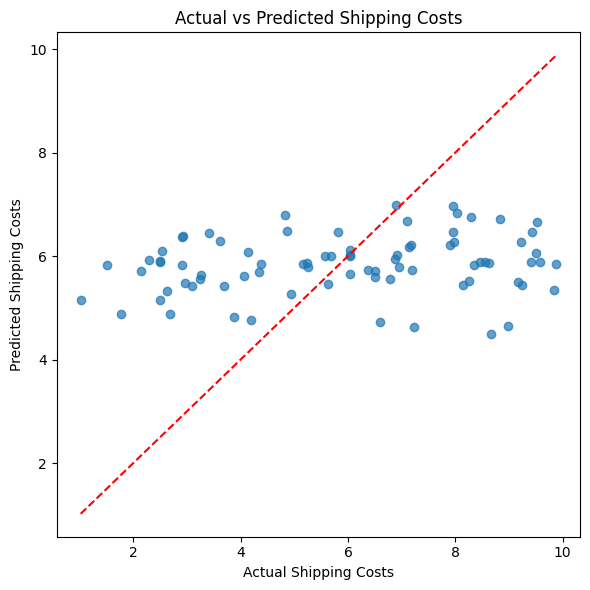

In [18]:
# --- 7. Visualize Predictions vs Actual ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Shipping Costs")
plt.ylabel("Predicted Shipping Costs")
plt.title("Actual vs Predicted Shipping Costs")
plt.tight_layout()
plt.show()

Although the model's error metrics slightly improved after data augmentation, the R² score remains very low (0.04), indicating that the selected features have limited predictive power for estimating shipping costs. This suggests that either key explanatory features are missing or shipping costs depend on more complex, possibly non-linear relationships.

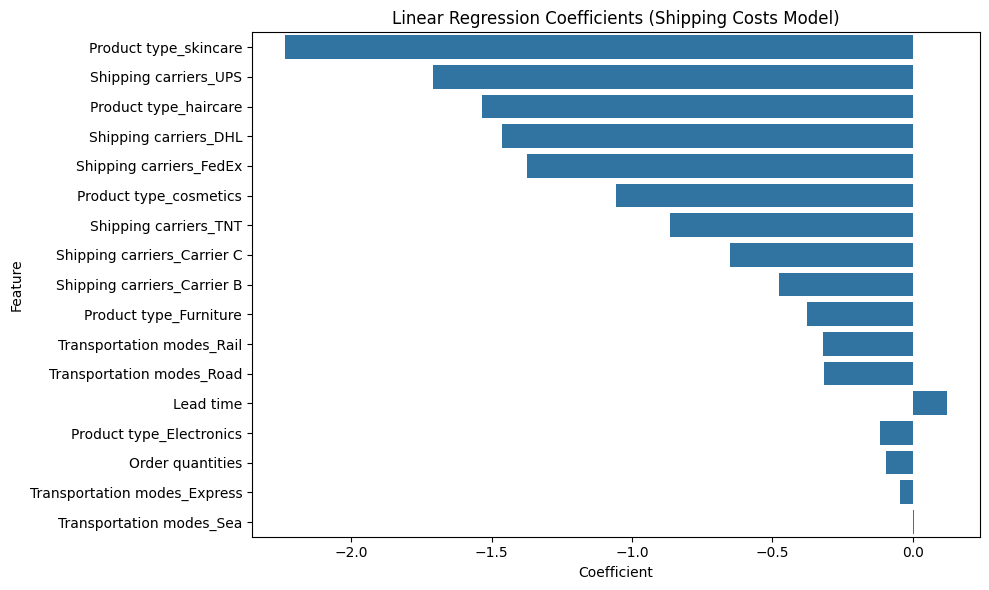

In [19]:
# --- 8. Feature Importance (from coefficients) ---
# Get feature names after preprocessing
onehot = pipeline.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = onehot.get_feature_names_out(categorical_features)

all_features = numeric_features + list(cat_feature_names)
coefficients = pipeline.named_steps["regressor"].coef_

coef_df = pd.DataFrame({"Feature": all_features, "Coefficient": coefficients})
coef_df = coef_df.sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Coefficient", y="Feature")
plt.title("Linear Regression Coefficients (Shipping Costs Model)")
plt.tight_layout()
plt.show()

In [20]:
# --- 9. Interpretation ---
# Example conclusion:
# Features like order quantity and transportation mode significantly influence shipping cost.
# The model shows reasonable predictive power and could support cost estimation before placing orders.

was könnte man noch weiter machen:
Kreuzvalidierungen, also mehrere Test Datensätze hernehmen
Prädiktorvariablen tauschen etwa durch Rückwärtselimination oder Vorwärtselimination und messen mithilfe des AIC Wertes. Dazu wäre in Kombination auch gut das adjustierte R2 zu messen. Dadurch dass kein Standardpaket in Python dafür gefunden wurde, wurde der Schritt aber vorerst weckgelassen 